# NYC Felony Dataset Initial Stats and Plots

Source: https://catalog.data.gov/dataset/nypd-7-major-felony-incidents

---
### Initial Set Up

In [1]:
# Initial Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
# loading felony data set
felony_df = pd.read_csv("NYPD_7_Major_Felony_Incidents.csv", parse_dates = 'Occurrence Date')

In [3]:
# reset index
felony_df.set_index('OBJECTID', inplace = True)

### Basic Dataset Info
__number of observations:__ 1123465  
__number of variables:__ 20  
__date range:__  1905-2015

In [4]:
# num observations
print(len(felony_df))

1123465


In [5]:
# print out date range
print(felony_df['Occurrence Year'].min())
print(felony_df['Occurrence Year'].max())

1905.0
2015.0


In [6]:
# list out the column names and their data types
for col in felony_df.columns:
    print('{:25}{:20}'.format(col, str(felony_df[col].dtype)))

Identifier               object              
Occurrence Date          object              
Day of Week              object              
Occurrence Month         object              
Occurrence Day           float64             
Occurrence Year          float64             
Occurrence Hour          float64             
CompStat Month           float64             
CompStat Day             float64             
CompStat Year            float64             
Offense                  object              
Offense Classification   object              
Sector                   object              
Precinct                 float64             
Borough                  object              
Jurisdiction             object              
XCoordinate              float64             
YCoordinate              float64             
Location 1               object              


### Some Initial Plots.

When we look at the data set in its entirety we see that 99% of the data is from 2006-2015. Brooklyn has the highest number of recorded felonies, and the most common felony offense is "Grand Larceny."

??? TODO: do we wan't to delete the entires from before 2006?

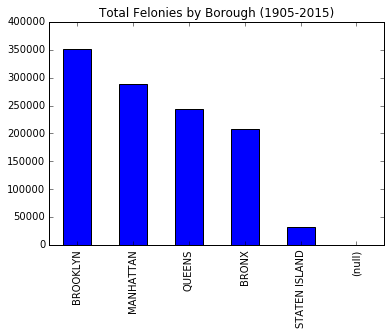

In [7]:
# plot crime incidence by borough (whole data set)
felony_df.Borough.value_counts().plot(kind = 'bar')
plt.title("Total Felonies by Borough (1905-2015)")

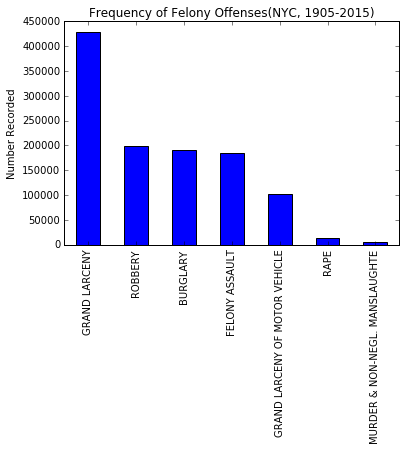

In [13]:
# plot crime incidence by felony type (whole data set)
felony_counts = felony_df.Offense.value_counts()
#counts.sort_values(inplace=True)
felony_counts.plot(kind = 'bar')
plt.title("Frequency of Felony Offenses(NYC, 1905-2015)")
plt.ylabel("Number Recorded")

Percent of data dated 2000 or after: 99.45%


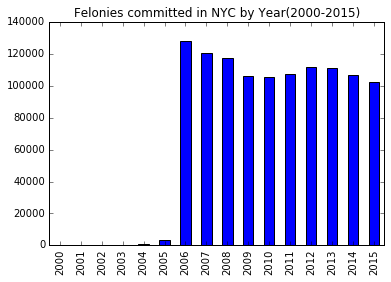

In [15]:
# what percent of the data is from 2006 and after?
year_counts = felony_df['Occurrence Year'].value_counts()
recent = year_counts[list(range(2006,2016))].sum()
print("Percent of data dated 2000 or after: {:.2f}%".format(recent/1123465 * 100))

# plot crime incidence by year (2000- 2015)
year_counts[list(range(2000,2016))].plot(kind = 'bar')
plt.title("Felonies committed in NYC by Year(2000-2015)")

### Starting to focus on Location.

When adjusted by borough population (using 2012 census data) Manhattan and not Brooklyn has the highest rate of recorded felonies.

In [64]:
# importing Borough population counts.
borough_df = pd.read_csv("New_York_City_Population_by_Boroughs.csv")

# capitalize borough and set them as index (to match NYPD Data)
borough_df.Borough = borough_df.Borough.apply(lambda x : x.upper())
borough_df.set_index('Borough', inplace = True)

# Add areas (measured in sq miles, source: wikipedia)
borough_df["Area(sq mi)"] = pd.Series({'BRONX': 42.47 , 'BROOKLYN': 69.5, 'MANHATTAN': 22.82 ,
                                'QUEENS': 108.1 , 'STATEN ISLAND': 57.92 })
# Take  a look
borough_df

,2000 Population,2010 Population,Area(sq mi)
Borough,,,
BRONX,1332650,1385108,42.47
BROOKLYN,2465326,2504700,69.50
MANHATTAN,1537195,1585873,22.82
QUEENS,2229379,2230722,108.10
STATEN ISLAND,443728,468730,57.92


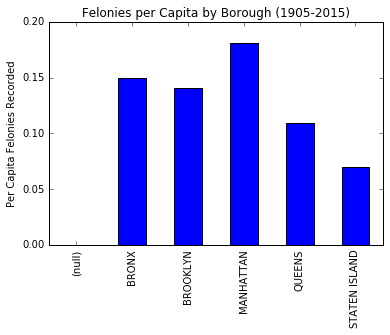

In [62]:
# Re computing borough totals relative to population size
felonies_per_capita = felony_df.Borough.value_counts()/borough_df['2010 Population']
felonies_per_capita.plot(kind = 'bar')
plt.title("Felonies per Capita by Borough (1905-2015)")
plt.ylabel("Per Capita Felonies Recorded")

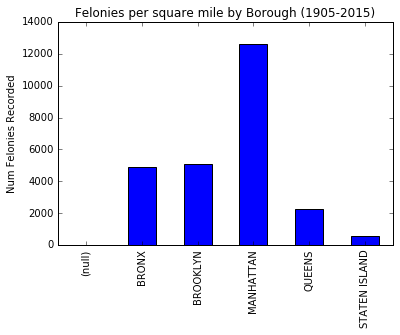

In [65]:
# Re computing borough totals relative to borough area
felonies_per_capita = felony_df.Borough.value_counts()/borough_df['Area(sq mi)']
felonies_per_capita.plot(kind = 'bar')
plt.title("Felonies per square mile by Borough (1905-2015)")
plt.ylabel("Num Felonies Recorded")

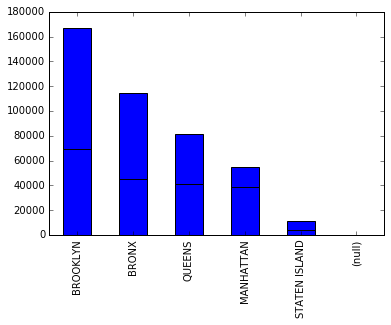

In [71]:
# plotting by borough and offense
for off, df in felony_df.groupby('Offense'):
    df.Borough.value_counts().plot(kind = 'bar')


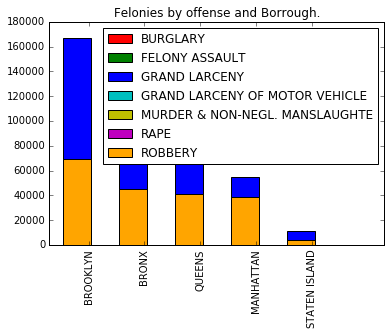

In [80]:
# plotting by borough and offense
fig, ax = plt.subplots()

ind = np.arange(5)
width = 0.25
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'orange']
counter = 0
for off, df in felony_df.groupby('Offense'):
    df.Borough.value_counts().plot(kind = 'bar', color = colors[counter], label = off)
    counter += 1

plt.title("Felonies by offense and Borrough.")
ax.set_xticks(offset + ind)
plt.legend()
       

In [58]:
# Extract Lattitude and Longitude from the string coordinates
get_lat = lambda x: str(x).split(',')[0].replace('(','')
get_long = lambda x: str(x).split(',')[1].replace(')','')  
    
felony_df['Latitude'] = felony_df['Location 1'].apply(get_lat)
felony_df['Longitude'] = felony_df['Location 1'].head().apply(get_long)
felony_df['Latitude'].head()   
# for some reason' I'm getting an error when I try to convert the rest of the longitudes 
# I'm going to move on for now and deal with it later (maybe just change the loc data type?)

OBJECTID
1    40.6227027620001
2    40.8037530600001
3        40.688874254
4    40.6674141890001
5    40.6668988440001
Name: Latitude, dtype: object

In [55]:
?felony_df.Borough.apply